<a href="https://colab.research.google.com/github/chouhandiksha/bigdataproject/blob/main/notebooks/Analysis%20LA%20Compare%202019%20with%202020%20Social%20Distancing%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LA Compare 2019 with 2020 Social Distancing

**Instructions:**

1. Execute the first code cell.
2. There will be a link to follow in order to authorize the google account for drive. Go to that link.
3. A code to authorize the google account will be generated. Copy the code generated.
4. Go back to the cell where the process of mounting the drive is running. Paste the generated code from step 3 to the text box in the cell and press enter.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from pathlib import Path

city = 'LA'
city_directory = 'la'
year = '2020'

# Provide a list of CSV file paths to read
path = Path('drive/MyDrive/big-data-project/data/clean-data/')
path_list = [path/city_directory/'social'/year]

In [ ]:
pip install geopandas

In [ ]:
pip install geoplot

In [ ]:
import os
import geopandas
import geoplot
import mapclassify
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange

import altair as alt
from vega_datasets import data

# # Allow altair to visualize large datasets
# alt.data_transformers.disable_max_rows()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# # Chicago Counties
# fips_ch = ['17031','17037','17043','17063','17091','17089','17093','17111','17197','17097','18073','18089','18111','18127','55059']

# # New York Counties
# fips_ny = ['36061','36047','36005','36085','36081']

# # LA Counties
# fips_la = ['06037','06059']

# path = Path('/Users/justinsnider/nyu-big-data/project/clean-data/')
# dir_list_la = [path/'la'/'social'/'2019',
#                path/'la'/'social'/'2020']

# dir_list_ny = [path/'ny'/'social'/'2019',
#                path/'ny'/'social'/'2020']

# dir_list_ch = [path/'ch'/'social'/'2019',
#                path/'ch'/'social'/'2020']

# dir_list = [path/'la'/'social'/'2019',
#             path/'la'/'social'/'2020',
#             path/'ny'/'social'/'2019',
#             path/'ny'/'social'/'2020',
#             path/'ch'/'social'/'2019',
#             path/'ch'/'social'/'2020']

In [ ]:
#Appending into dataframe

def get_df(path_list):
    df = []
    first = True
    for directory in tqdm(path_list, desc='Years'):
        f_list = os.listdir(directory)
        csv_files = [directory/f for f in f_list if f.endswith('.csv')]
        for csv in tqdm(csv_files, desc='Days'):
            if first:
                df = pd.read_csv(csv, dtype={'cbg': object})
                first = False
            else:
                df = df.append(pd.read_csv(csv, dtype={'cbg': object}), ignore_index=True)
    return df.sort_values(by=['date_range_start'])

In [ ]:
%%time

df = get_df(path_list)



CPU times: user 11min 8s, sys: 17.5 s, total: 11min 25s
Wall time: 18min 5s


In [ ]:
df

,Unnamed: 0,cbg,date_range_start,date_range_end,device_count,distance_traveled_from_home,bucketed_distance_traveled,median_dwell_at_bucketed_distance_traveled,completely_home_device_count,median_home_dwell_time,bucketed_home_dwell_time,at_home_by_each_hour,part_time_work_behavior_devices,full_time_work_behavior_devices,destination_cbgs,delivery_behavior_devices,median_non_home_dwell_time,candidate_device_count,bucketed_away_from_home_time,median_percentage_time_home,bucketed_percentage_time_home,mean_home_dwell_time,mean_non_home_dwell_time,mean_distance_traveled_from_home
2426095,264,060374034022,2020-01-01T00:00:00-08:00,2020-01-02T00:00:00-08:00,180,8377.0,"{""16001-50000"":29,""0"":69,"">50000"":16,""2001-800...","{""16001-50000"":41,"">50000"":87,""<1000"":295,""200...",72,148,"{""721-1080"":30,""361-720"":10,""61-360"":37,""<60"":...","[67,78,74,72,68,60,57,59,67,63,59,61,52,53,51,...",7,4,"{""482015430022"":1,""060374081362"":2,""0603740821...",7,24,333,"{""21-45"":16,""541-600"":1,""46-60"":4,""721-840"":1,...",88,"{""26-50"":2,""51-75"":7,""0-25"":53,"">100"":1,""76-10...",NaN,NaN,NaN
2428827,72862,060375705014,2020-01-01T00:00:00-08:00,2020-01-02T00:00:00-08:00,62,9362.0,"{""16001-50000"":1,""0"":30,"">50000"":6,""2001-8000""...","{""16001-50000"":109,"">50000"":362,""<1000"":9,""200...",30,952,"{""721-1080"":12,""361-720"":3,""61-360"":9,""<60"":8,...","[36,35,38,35,37,36,36,35,36,38,35,36,36,35,33,...",5,1,"{""060375519001"":1,""060379800071"":1,""0401311410...",2,4,112,"{""21-45"":1,""481-540"":3,""541-600"":1,""1201-1320""...",100,"{""26-50"":2,""51-75"":4,""0-25"":10,"">100"":2,""76-10...",NaN,NaN,NaN
2428828,72863,060375727004,2020-01-01T00:00:00-08:00,2020-01-02T00:00:00-08:00,64,6688.0,"{""16001-50000"":3,""0"":27,"">50000"":3,""2001-8000""...","{""16001-50000"":78,"">50000"":88,""<1000"":19,""2001...",30,682,"{""721-1080"":6,""361-720"":13,""61-360"":8,""<60"":10...","[32,31,35,34,36,39,38,30,38,39,38,36,34,30,35,...",4,3,"{""060379005012"":1,""060375418012"":3,""0603760250...",2,17,134,"{""21-45"":5,""481-540"":2,""541-600"":1,""46-60"":1,""...",98,"{""26-50"":3,""51-75"":4,""0-25"":9,"">100"":1,""76-100...",NaN,NaN,NaN
2428829,72864,060379005011,2020-01-01T00:00:00-08:00,2020-01-02T00:00:00-08:00,71,5461.0,"{""16001-50000"":2,""0"":38,"">50000"":9,""2001-8000""...","{""16001-50000"":21,"">50000"":74,""<1000"":73,""2001...",37,811,"{""721-1080"":5,""361-720"":5,""61-360"":5,""<60"":18,...","[40,40,37,41,40,40,40,39,40,38,39,38,35,35,37,...",1,1,"{""060379102011"":1,""060379001021"":1,""0603790050...",1,0,163,"{""21-45"":7,""1201-1320"":1,""301-360"":1,""<20"":45,...",100,"{"">100"":2,""0-25"":9,""76-100"":48,""51-75"":2}",NaN,NaN,NaN
2428830,72865,060590320154,2020-01-01T00:00:00-08:00,2020-01-02T00:00:00-08:00,106,5415.0,"{""16001-50000"":7,""0"":30,"">50000"":11,""2001-8000...","{""16001-50000"":22,"">50000"":48,""<1000"":61,""2001...",28,1058,"{""721-1080"":16,""361-720"":12,""61-360"":13,""<60"":...","[65,63,60,63,66,64,67,65,68,61,58,65,66,67,67,...",5,1,"{""060590423111"":1,""060590320472"":1,""0605905242...",1,88,150,"{""21-45"":7,""481-540"":1,""541-600"":6,""46-60"":1,""...",92,"{""26-50"":7,""51-75"":7,""0-25"":20,"">100"":2,""76-10...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908426,147366,060375550013,2020-12-31T00:00:00-08:00,2021-01-01T00:00:00-08:00,49,1713.0,"{""16001-50000"":2,""0"":13,"">50000"":1,""2001-8000""...","{""16001-50000"":7,"">50000"":20,""2001-8000"":16,""1...",16,1056,"{""721-1080"":7,""361-720"":1,""61-360"":3,""<60"":6,""...","[27,26,27,28,29,27,28,25,22,21,17,18,19,18,25,...",3,4,"{""060375552121"":1,""060371873002"":1,""0603755030...",1,46,72,"{""21-45"":3,""481-540"":3,""46-60"":3,""721-840"":1,""...",93,"{""0-25"":7,""76-100"":25,""51-75"":2,""26-50"":1}",892.0,230.0,3193.0
2908427,147368,060590423361,2020-12-31T00:00:00-08:00,2021-01-01T00:00:00-08:00,146,1004.0,"{""16001-50000"":1,""0"":55,"">50000

In [ ]:
[print(c) for c in df.columns];

Unnamed: 0
cbg
date_range_start
date_range_end
device_count
distance_traveled_from_home
bucketed_distance_traveled
median_dwell_at_bucketed_distance_traveled
completely_home_device_count
median_home_dwell_time
bucketed_home_dwell_time
at_home_by_each_hour
part_time_work_behavior_devices
full_time_work_behavior_devices
destination_cbgs
delivery_behavior_devices
median_non_home_dwell_time
candidate_device_count
bucketed_away_from_home_time
median_percentage_time_home
bucketed_percentage_time_home
mean_home_dwell_time
mean_non_home_dwell_time
mean_distance_traveled_from_home


In [ ]:
# Selecting the columsn that we need for the analysis
# col = ['date_range_start',
#        'cbg',
#        'device_count',  # Total active devices
#        'completely_home_device_count',
#        'part_time_work_behavior_devices',
#        'full_time_work_behavior_devices',
#        'delivery_behavior_devices',
#        'median_percentage_time_home',
#        'median_home_dwell_time',
#        'mean_home_dwell_time',
#        'median_non_home_dwell_time',
#        'mean_non_home_dwell_time',
#        'distance_traveled_from_home', # Median Distance traveled
#        'mean_distance_traveled_from_home']
col = ['date_range_start',
       'cbg',
       'device_count',  # Total active devices
       'completely_home_device_count',
       'part_time_work_behavior_devices',
       'full_time_work_behavior_devices']
devices_mobility = df[col]

In [ ]:
#Renaming columns

devices_mobility = devices_mobility.rename(columns={'date_range_start':'date','device_count':'total', 'completely_home_device_count':'completely_home','part_time_work_behavior_devices':'part_time_work', 'full_time_work_behavior_devices':'full_time_work'})
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work
2426095,2020-01-01T00:00:00-08:00,060374034022,180,72,7,4
2428827,2020-01-01T00:00:00-08:00,060375705014,62,30,5,1
2428828,2020-01-01T00:00:00-08:00,060375727004,64,30,4,3
2428829,2020-01-01T00:00:00-08:00,060379005011,71,37,1,1
2428830,2020-01-01T00:00:00-08:00,060590320154,106,28,5,1
...,...,...,...,...,...,...
2908426,2020-12-31T00:00:00-08:00,060375550013,49,16,3,4
2908427,2020-12-31T00:00:00-08:00,060590423361,146,53,9,1
2908428,2020-12-31T00:00:00-08:00,060372920002,53,18,4,4
2908334,2020-12-31T00:00:00-08:00,060371232032,25,10,1,1


In [ ]:
# devices_mobility

In [ ]:
#Listing out the device count columns

device_columns = ['completely_home','part_time_work','full_time_work']

In [ ]:
#Calculating percentage for all the device columns
for column in device_columns :
    devices_mobility['percentage_'+column]= devices_mobility.apply(lambda row: row[column]/row['total']*100.0 if row['total']!=0.0 else 0.0, axis=1)
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work
2426095,2020-01-01T00:00:00-08:00,060374034022,180,72,7,4,40.000000,3.888889,2.222222
2428827,2020-01-01T00:00:00-08:00,060375705014,62,30,5,1,48.387097,8.064516,1.612903
2428828,2020-01-01T00:00:00-08:00,060375727004,64,30,4,3,46.875000,6.250000,4.687500
2428829,2020-01-01T00:00:00-08:00,060379005011,71,37,1,1,52.112676,1.408451,1.408451
2428830,2020-01-01T00:00:00-08:00,060590320154,106,28,5,1,26.415094,4.716981,0.943396
...,...,...,...,...,...,...,...,...,...
2908426,2020-12-31T00:00:00-08:00,060375550013,49,16,3,4,32.653061,6.122449,8.163265
2908427,2020-12-31T00:00:00-08:00,060590423361,146,53,9,1,36.301370,6.164384,0.684932
2908428,2020-12-31T00:00:00-08:00,060372920002,53,18,4,4,33.962264,7.547170,7.547170
2908334,2020-12-31T00:00:00-08:00,060371232032,25,10,1,1,40.000000,4.000000,4.000000


In [ ]:
#Normalising the percentage columns

for column in device_columns:
        devices_mobility['norm_'+column] = (devices_mobility['percentage_'+ column] - devices_mobility['percentage_'+column].mean()) / devices_mobility['percentage_'+column].std()

devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
2426095,2020-01-01T00:00:00-08:00,060374034022,180,72,7,4,40.000000,3.888889,2.222222,0.476644,-0.712484,-0.715133
2428827,2020-01-01T00:00:00-08:00,060375705014,62,30,5,1,48.387097,8.064516,1.612903,1.149898,0.091558,-0.874239
2428828,2020-01-01T00:00:00-08:00,060375727004,64,30,4,3,46.875000,6.250000,4.687500,1.028518,-0.257838,-0.071400
2428829,2020-01-01T00:00:00-08:00,060379005011,71,37,1,1,52.112676,1.408451,1.408451,1.448960,-1.190108,-0.927625
2428830,2020-01-01T00:00:00-08:00,060590320154,106,28,5,1,26.415094,4.716981,0.943396,-0.613851,-0.553030,-1.049060
...,...,...,...,...,...,...,...,...,...,...,...,...
2908426,2020-12-31T00:00:00-08:00,060375550013,49,16,3,4,32.653061,6.122449,8.163265,-0.113114,-0.282399,0.836191
2908427,2020-12-31T00:00:00-08:00,060590423361,146,53,9,1,36.301370,6.164384,0.684932,0.179746,-0.274324,-1.116551
2908428,2020-12-31T00:00:00-08:00,060372920002,53,18,4,4,33.962264,7.547170,7.547170,-0.008021,-0.008060,0.675316
2908334,2020-12-31T00:00:00-08:00,060371232032,25,10,1,1,40.000000,4.000000,4.000000,0.476644,-0.691089,-0.250920


In [ ]:
#Converting datetime format
devices_mobility['date'] = pd.to_datetime(devices_mobility['date'],utc= True)
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
2426095,2020-01-01 08:00:00+00:00,060374034022,180,72,7,4,40.000000,3.888889,2.222222,0.476644,-0.712484,-0.715133
2428827,2020-01-01 08:00:00+00:00,060375705014,62,30,5,1,48.387097,8.064516,1.612903,1.149898,0.091558,-0.874239
2428828,2020-01-01 08:00:00+00:00,060375727004,64,30,4,3,46.875000,6.250000,4.687500,1.028518,-0.257838,-0.071400
2428829,2020-01-01 08:00:00+00:00,060379005011,71,37,1,1,52.112676,1.408451,1.408451,1.448960,-1.190108,-0.927625
2428830,2020-01-01 08:00:00+00:00,060590320154,106,28,5,1,26.415094,4.716981,0.943396,-0.613851,-0.553030,-1.049060
...,...,...,...,...,...,...,...,...,...,...,...,...
2908426,2020-12-31 08:00:00+00:00,060375550013,49,16,3,4,32.653061,6.122449,8.163265,-0.113114,-0.282399,0.836191
2908427,2020-12-31 08:00:00+00:00,060590423361,146,53,9,1,36.301370,6.164384,0.684932,0.179746,-0.274324,-1.116551
2908428,2020-12-31 08:00:00+00:00,060372920002,53,18,4,4,33.962264,7.547170,7.547170,-0.008021,-0.008060,0.675316
2908334,2020-12-31 08:00:00+00:00,060371232032,25,10,1,1,40.000000,4.000000,4.000000,0.476644,-0.691089,-0.250920


In [ ]:
# Normalize time
devices_mobility['date'] = devices_mobility['date'].dt.normalize()
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
2426095,2020-01-01 00:00:00+00:00,060374034022,180,72,7,4,40.000000,3.888889,2.222222,0.476644,-0.712484,-0.715133
2428827,2020-01-01 00:00:00+00:00,060375705014,62,30,5,1,48.387097,8.064516,1.612903,1.149898,0.091558,-0.874239
2428828,2020-01-01 00:00:00+00:00,060375727004,64,30,4,3,46.875000,6.250000,4.687500,1.028518,-0.257838,-0.071400
2428829,2020-01-01 00:00:00+00:00,060379005011,71,37,1,1,52.112676,1.408451,1.408451,1.448960,-1.190108,-0.927625
2428830,2020-01-01 00:00:00+00:00,060590320154,106,28,5,1,26.415094,4.716981,0.943396,-0.613851,-0.553030,-1.049060
...,...,...,...,...,...,...,...,...,...,...,...,...
2908426,2020-12-31 00:00:00+00:00,060375550013,49,16,3,4,32.653061,6.122449,8.163265,-0.113114,-0.282399,0.836191
2908427,2020-12-31 00:00:00+00:00,060590423361,146,53,9,1,36.301370,6.164384,0.684932,0.179746,-0.274324,-1.116551
2908428,2020-12-31 00:00:00+00:00,060372920002,53,18,4,4,33.962264,7.547170,7.547170,-0.008021,-0.008060,0.675316
2908334,2020-12-31 00:00:00+00:00,060371232032,25,10,1,1,40.000000,4.000000,4.000000,0.476644,-0.691089,-0.250920


In [ ]:
# Check the number of rows for each CBG
print('Min: {}\nMax: {}'.format(min(set(devices_mobility.groupby('cbg').count()['date'])), max(set(devices_mobility.groupby('cbg').count()['date']))))

Min: 4
Max: 366


In [ ]:
for col in devices_mobility.columns:
    print('\n')
    print(col)
#     if devices_mobility[col].dtype
#     print(devices_mobility[col].dtype)
    print('Min: {}\nMax: {}'.format(devices_mobility[col].min(), devices_mobility[col].max()))



date
Min: 2020-01-01 00:00:00+00:00
Max: 2020-12-31 00:00:00+00:00


cbg
Min: 060371011101
Max: 060599901000


total
Min: 5
Max: 6061


completely_home
Min: 1
Max: 4880


part_time_work
Min: 1
Max: 310


full_time_work
Min: 1
Max: 137


percentage_completely_home
Min: 0.27932960893854747
Max: 95.32710280373831


percentage_part_time_work
Min: 0.10548523206751054
Max: 68.42105263157895


percentage_full_time_work
Min: 0.06493506493506493
Max: 66.66666666666666


norm_completely_home
Min: -2.7118367868990654
Max: 4.917893735395232


norm_part_time_work
Min: -1.44100212177791
Max: 11.71358018630461


norm_full_time_work
Min: -1.278444154130733
Max: 16.112595185881606


In [ ]:
# Print all Null and NaN values
print('We have {} null values.'.format(len(devices_mobility[devices_mobility.isna().any(axis=1)])))

We have 0 null values.


In [ ]:
# Grouping based on day
grouped_dm = devices_mobility.groupby(devices_mobility['date']).mean()
grouped_dm

,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
date,,,,,,,,,,
2020-01-01 00:00:00+00:00,73.608970,23.145132,3.362344,1.668287,31.299453,5.155844,3.070881,-0.221771,-0.468525,-0.493532
2020-01-02 00:00:00+00:00,70.456247,19.054205,5.493802,2.973140,26.392264,7.750151,4.514622,-0.615684,0.031025,-0.116542
2020-01-03 00:00:00+00:00,70.927105,18.995991,6.198153,3.325841,26.499524,8.914360,5.135416,-0.607074,0.255201,0.045560
2020-01-04 00:00:00+00:00,69.990397,19.455938,3.625866,1.549167,27.350435,5.293438,2.728989,-0.538769,-0.442030,-0.582807
2020-01-05 00:00:00+00:00,71.257414,22.585805,4.141954,1.680846,31.553971,6.104173,2.975595,-0.201340,-0.285918,-0.518413
...,...,...,...,...,...,...,...,...,...,...
2020-12-27 00:00:00+00:00,59.418715,24.859820,2.348990,1.197858,37.619213,4.669616,3.161594,0.285532,-0.562151,-0.469845
2020-12-28 00:00:00+00:00,59.899282,26.590074,3.996351,2.557110,41.758467,7.931426,5.720130,0.617801,0.065931,0.198240
2020-12-29 00:00:00+00:00,58.958764,22.100231,3.211531,1.791631,32.545233,6.045221,4.101857,-0.121769,-0.297270,-0.224323


In [ ]:
grouped_dm.reset_index()

,date,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
0,2020-01-01 00:00:00+00:00,73.608970,23.145132,3.362344,1.668287,31.299453,5.155844,3.070881,-0.221771,-0.468525,-0.493532
1,2020-01-02 00:00:00+00:00,70.456247,19.054205,5.493802,2.973140,26.392264,7.750151,4.514622,-0.615684,0.031025,-0.116542
2,2020-01-03 00:00:00+00:00,70.927105,18.995991,6.198153,3.325841,26.499524,8.914360,5.135416,-0.607074,0.255201,0.045560
3,2020-01-04 00:00:00+00:00,69.990397,19.455938,3.625866,1.549167,27.350435,5.293438,2.728989,-0.538769,-0.442030,-0.582807
4,2020-01-05 00:00:00+00:00,71.257414,22.585805,4.141954,1.680846,31.553971,6.104173,2.975595,-0.201340,-0.285918,-0.518413
...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27 00:00:00+00:00,59.418715,24.859820,2.348990,1.197858,37.619213,4.669616,3.161594,0.285532,-0.562151,-0.469845
362,2020-12-28 00:00:00+00:00,59.899282,26.590074,3.996351,2.557110,41.758467,7.931426,5.720130,0.617801,0.065931,0.198240
363,2020-12-29 00:00:00+00:00,58.958764,22.100231,3.211531,1.791631,32.545233,6.045221,4.101857,-0.121769,-0.297270,-0.224323
364,2020-12-30 00:00:00+00:00,58.491730,22.171126,3.431525,1.905254,33.295172,6.724038,4.425980,-0.061570,-0.166559,-0.139689


In [ ]:
#Visualising mobility

title = '{} {}'.format(city,year)
alt.Chart(grouped_dm.reset_index()).mark_line().encode(
    x=alt.X('date', title='Date'),
    y=alt.Y(alt.repeat('row'), type='quantitative')
).properties(
    width=300,
    height=250
).repeat(
    row=['percentage_completely_home','percentage_part_time_work','percentage_full_time_work']
).interactive()

alt.RepeatChart(...)

![ch-daily-2020](https://github.com/chouhandiksha/bigdataproject/raw/main/media/social-dist/ch-daily-2020.png)

In [ ]:
#Adding month column for further usage
devices_mobility['month'] = devices_mobility['date'].dt.month
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month
2426095,2020-01-01 00:00:00+00:00,060374034022,180,72,7,4,40.000000,3.888889,2.222222,0.476644,-0.712484,-0.715133,1
2428827,2020-01-01 00:00:00+00:00,060375705014,62,30,5,1,48.387097,8.064516,1.612903,1.149898,0.091558,-0.874239,1
2428828,2020-01-01 00:00:00+00:00,060375727004,64,30,4,3,46.875000,6.250000,4.687500,1.028518,-0.257838,-0.071400,1
2428829,2020-01-01 00:00:00+00:00,060379005011,71,37,1,1,52.112676,1.408451,1.408451,1.448960,-1.190108,-0.927625,1
2428830,2020-01-01 00:00:00+00:00,060590320154,106,28,5,1,26.415094,4.716981,0.943396,-0.613851,-0.553030,-1.049060,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908426,2020-12-31 00:00:00+00:00,060375550013,49,16,3,4,32.653061,6.122449,8.163265,-0.113114,-0.282399,0.836191,12
2908427,2020-12-31 00:00:00+00:00,060590423361,146,53,9,1,36.301370,6.164384,0.684932,0.179746,-0.274324,-1.116551,12
2908428,2020-12-31 00:00:00+00:00,060372920002,53,18,4,4,33.962264,7.547170,7.547170,-0.008021,-0.008060,0.675316,12
2908334,2020-12-31 00:00:00+00:00,060371232032,25,10,1,1,40.000000,4.000000,4.000000,0.476644,-0.691089,-0.250920,12


In [ ]:
#Grouping data on basis of month value

grouped_dm = devices_mobility.groupby([devices_mobility['month']]).mean()
grouped_dm

,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
month,,,,,,,,,,
1,64.569583,15.262406,6.717764,3.515342,23.632740,10.402345,5.808232,-0.837198,0.541721,0.221245
2,69.151853,16.219040,7.090874,3.591987,23.508330,10.140497,5.504732,-0.847185,0.491301,0.141995
3,63.871336,21.039198,5.291065,3.186516,33.994233,8.231196,5.367103,-0.005454,0.123653,0.106058
4,58.867754,27.674818,3.057678,2.134200,46.469361,5.621818,4.244982,0.995956,-0.378798,-0.186951
5,61.116766,25.927882,3.447572,2.168557,41.773024,5.921970,4.099867,0.618969,-0.321002,-0.224843
6,61.503653,23.057452,4.073366,2.502177,36.445420,6.866091,4.605769,0.191309,-0.139206,-0.092742
7,61.616698,23.233499,4.120085,2.526316,35.888360,7.077999,4.796161,0.146592,-0.098402,-0.043027
8,66.297758,26.108966,4.242744,2.580252,34.264819,7.368602,4.948453,0.016266,-0.042444,-0.003260
9,60.751816,20.912530,4.326201,2.729334,33.824846,7.617785,5.334697,-0.019051,0.005537,0.097596


In [ ]:
d = []
for col in ['percentage_completely_home','percentage_part_time_work','percentage_full_time_work']:
        for m in range(1,13):
            d.append({'month': m, 'column': col, 'value': grouped_dm[col][m]})
d = alt.Data(values=d)

In [ ]:
title = '{} {}'.format(city,year)
alt.Chart(d, title=title).mark_line().encode(
    x=alt.X('month:O', title='Month'),
    y=alt.Y('value:Q', type='quantitative', title='Percentage'),
    color='column:N'
).properties(
    width=300,
    height=250
).interactive()

alt.Chart(...)

![ch-monthly-2020](https://github.com/chouhandiksha/bigdataproject/raw/main/media/social-dist/ch-monthly-2020.png)

In [ ]:
grouped_daily = devices_mobility.groupby([devices_mobility['date']]).mean()
grouped_daily

,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month
date,,,,,,,,,,,
2020-01-01 00:00:00+00:00,73.608970,23.145132,3.362344,1.668287,31.299453,5.155844,3.070881,-0.221771,-0.468525,-0.493532,1.0
2020-01-02 00:00:00+00:00,70.456247,19.054205,5.493802,2.973140,26.392264,7.750151,4.514622,-0.615684,0.031025,-0.116542,1.0
2020-01-03 00:00:00+00:00,70.927105,18.995991,6.198153,3.325841,26.499524,8.914360,5.135416,-0.607074,0.255201,0.045560,1.0
2020-01-04 00:00:00+00:00,69.990397,19.455938,3.625866,1.549167,27.350435,5.293438,2.728989,-0.538769,-0.442030,-0.582807,1.0
2020-01-05 00:00:00+00:00,71.257414,22.585805,4.141954,1.680846,31.553971,6.104173,2.975595,-0.201340,-0.285918,-0.518413,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27 00:00:00+00:00,59.418715,24.859820,2.348990,1.197858,37.619213,4.669616,3.161594,0.285532,-0.562151,-0.469845,12.0
2020-12-28 00:00:00+00:00,59.899282,26.590074,3.996351,2.557110,41.758467,7.931426,5.720130,0.617801,0.065931,0.198240,12.0
2020-12-29 00:00:00+00:00,58.958764,22.100231,3.211531,1.791631,32.545233,6.045221,4.101857,-0.121769,-0.297270,-0.224323,12.0


In [ ]:
#Visualising mobility

title = '{} {}'.format(city,year)
alt.Chart(grouped_daily.reset_index()).mark_line().encode(
    x=alt.X('date', title='Date'),
    y=alt.Y(alt.repeat('row'), type='quantitative')
).properties(
    width=300,
    height=250
).repeat(
    row=['percentage_completely_home','percentage_part_time_work','percentage_full_time_work']
).interactive()

alt.RepeatChart(...)

In [ ]:
grouped_daily

,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month
date,,,,,,,,,,,
2020-01-01 00:00:00+00:00,73.608970,23.145132,3.362344,1.668287,31.299453,5.155844,3.070881,-0.221771,-0.468525,-0.493532,1.0
2020-01-02 00:00:00+00:00,70.456247,19.054205,5.493802,2.973140,26.392264,7.750151,4.514622,-0.615684,0.031025,-0.116542,1.0
2020-01-03 00:00:00+00:00,70.927105,18.995991,6.198153,3.325841,26.499524,8.914360,5.135416,-0.607074,0.255201,0.045560,1.0
2020-01-04 00:00:00+00:00,69.990397,19.455938,3.625866,1.549167,27.350435,5.293438,2.728989,-0.538769,-0.442030,-0.582807,1.0
2020-01-05 00:00:00+00:00,71.257414,22.585805,4.141954,1.680846,31.553971,6.104173,2.975595,-0.201340,-0.285918,-0.518413,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27 00:00:00+00:00,59.418715,24.859820,2.348990,1.197858,37.619213,4.669616,3.161594,0.285532,-0.562151,-0.469845,12.0
2020-12-28 00:00:00+00:00,59.899282,26.590074,3.996351,2.557110,41.758467,7.931426,5.720130,0.617801,0.065931,0.198240,12.0
2020-12-29 00:00:00+00:00,58.958764,22.100231,3.211531,1.791631,32.545233,6.045221,4.101857,-0.121769,-0.297270,-0.224323,12.0


In [ ]:
grouped_rolling = grouped_daily.rolling(10).mean()[9:]
grouped_rolling

,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month
date,,,,,,,,,,,
2020-01-10 00:00:00+00:00,70.162188,18.530934,6.238386,3.249229,26.137277,8.926044,4.965435,-0.636152,0.257451,0.001174,1.0
2020-01-11 00:00:00+00:00,69.548326,17.979207,6.348177,3.261083,25.630184,9.081088,4.974170,-0.676858,0.287305,0.003455,1.0
2020-01-12 00:00:00+00:00,69.330165,17.980360,6.180836,3.119633,25.790664,8.882779,4.820916,-0.663976,0.249120,-0.036563,1.0
2020-01-13 00:00:00+00:00,68.716774,17.492518,6.369471,3.252094,25.357225,9.198229,5.027866,-0.698769,0.309861,0.017476,1.0
2020-01-14 00:00:00+00:00,68.116007,16.883489,6.866950,3.584417,24.761867,9.987633,5.527609,-0.746560,0.461866,0.147969,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27 00:00:00+00:00,57.862932,21.913775,3.227105,1.683677,34.078040,6.323704,4.051897,0.001273,-0.243646,-0.237369,12.0
2020-12-28 00:00:00+00:00,57.987263,22.556973,3.255415,1.736081,35.189743,6.434182,4.185272,0.090512,-0.222373,-0.202542,12.0
2020-12-29 00:00:00+00:00,58.127037,22.605995,3.275827,1.778118,34.985015,6.437544,4.246313,0.074078,-0.221725,-0.186603,12.0


In [ ]:
#Visualising mobility

title = '{} {}'.format(city,year)
alt.Chart(grouped_rolling.reset_index()).mark_line().encode(
    x=alt.X('date', title='Date'),
    y=alt.Y(alt.repeat('row'), type='quantitative')
).properties(
    width=300,
    height=250
).repeat(
    row=['percentage_completely_home','percentage_part_time_work','percentage_full_time_work']
).interactive()

alt.RepeatChart(...)

In [ ]:
filename = 'drive/MyDrive/big-data-project/analysis/{}_social_summary_{}.csv'.format(city_directory, 2019)
stat_2019 = pd.read_csv(filename, index_col=0)
stat_2019

,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month
count,3.004769e+06,3.004769e+06,3.004769e+06,3.004769e+06,3.004769e+06,3.004769e+06,3.004769e+06,3.004769e+06,3.004769e+06,3.004769e+06,3.004769e+06
mean,8.784796e+01,2.776353e+01,8.179268e+00,4.286186e+00,3.014549e+01,9.604832e+00,5.274169e+00,2.506247e-12,2.150548e-12,-6.891095e-14,6.525355e+00
std,1.055159e+02,4.993209e+01,8.106741e+00,4.523167e+00,1.015507e+01,5.545535e+00,3.942956e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.447803e+00
min,5.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.289308e-01,7.530120e-02,6.414368e-02,-2.906584e+00,-1.718415e+00,-1.321350e+00,1.000000e+00
25%,5.000000e+01,1.300000e+01,3.000000e+00,1.000000e+00,2.307692e+01,5.263158e+00,2.150538e+00,-6.960632e-01,-7.829136e-01,-7.922054e-01,4.000000e+00
50%,7.100000e+01,2.100000e+01,6.000000e+00,3.000000e+00,2.985075e+01,8.917197e+00,4.166667e+00,-2.902449e-02,-1.239979e-01,-2.808812e-01,7.000000e+00
75%,1.020000e+02,3.200000e+01,1.100000e+01,6.000000e+00,3.684211e+01,1.304348e+01,7.471264e+00,6.594356e-01,6.200748e-01,5.572204e-01,1.000000e+01
max,1.342500e+04,8.305000e+03,6.010000e+02,2.790000e+02,9.446320e+01,5.714286e+01,5.000000e+01,6.333558e+00,8.572307e+00,1.134322e+01,1.200000e+01


In [ ]:
stat_2019.loc['mean','percentage_completely_home']

30.14549191952775

In [ ]:
grouped_rolling['percentage_completely_home_deviation'] = grouped_rolling['percentage_completely_home'] - stat_2019.loc['mean','percentage_completely_home']
grouped_rolling

,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month,percentage_completely_home_deviation
date,,,,,,,,,,,,
2020-01-10 00:00:00+00:00,70.162188,18.530934,6.238386,3.249229,26.137277,8.926044,4.965435,-0.636152,0.257451,0.001174,1.0,-4.008215
2020-01-11 00:00:00+00:00,69.548326,17.979207,6.348177,3.261083,25.630184,9.081088,4.974170,-0.676858,0.287305,0.003455,1.0,-4.515308
2020-01-12 00:00:00+00:00,69.330165,17.980360,6.180836,3.119633,25.790664,8.882779,4.820916,-0.663976,0.249120,-0.036563,1.0,-4.354828
2020-01-13 00:00:00+00:00,68.716774,17.492518,6.369471,3.252094,25.357225,9.198229,5.027866,-0.698769,0.309861,0.017476,1.0,-4.788267
2020-01-14 00:00:00+00:00,68.116007,16.883489,6.866950,3.584417,24.761867,9.987633,5.527609,-0.746560,0.461866,0.147969,1.0,-5.383625
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27 00:00:00+00:00,57.862932,21.913775,3.227105,1.683677,34.078040,6.323704,4.051897,0.001273,-0.243646,-0.237369,12.0,3.932549
2020-12-28 00:00:00+00:00,57.987263,22.556973,3.255415,1.736081,35.189743,6.434182,4.185272,0.090512,-0.222373,-0.202542,12.0,5.044251
2020-12-29 00:00:00+00:00,58.127037,22.605995,3.275827,1.778118,34.985015,6.437544,4.246313,0.074078,-0.221725,-0.186603,12.0,4.839523


In [ ]:
stat_2019.loc['mean','percentage_completely_home']

30.14549191952775

In [ ]:
pd.DataFrame({'y':[stat_2019.loc['mean','percentage_completely_home']]})

,y
0,30.145492


In [ ]:
#Visualising mobility

title = '{} {}'.format(city,year)
chart = alt.Chart(grouped_rolling.reset_index()).mark_line().encode(
    x=alt.X('date', title='Date'),
    y=alt.Y('percentage_completely_home_deviation', type='quantitative')
).properties(
    width=300,
    height=250
)

line = alt.Chart(pd.DataFrame({'percentage_completely_home_deviation':[0]})).mark_rule(color='#757575',strokeDash=[5,3], size=2).encode(
    y='percentage_completely_home_deviation',
    # color=alt.value("#757575"),
    size=alt.value(2),
)

( line + chart ).interactive()

alt.LayerChart(...)

In [ ]:
# Graph Weekly Mobility 
## Difference from avarage
## Grouped by poverty
## Grouped by race

# Graph Daily Mobility

In [ ]:
devices_mobility['percentage_completely_home_deviation'] = devices_mobility['percentage_completely_home'] - stat_2019.loc['mean','percentage_completely_home']
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month,percentage_completely_home_deviation
2426095,2020-01-01 00:00:00+00:00,060374034022,180,72,7,4,40.000000,3.888889,2.222222,0.476644,-0.712484,-0.715133,1,9.854508
2428827,2020-01-01 00:00:00+00:00,060375705014,62,30,5,1,48.387097,8.064516,1.612903,1.149898,0.091558,-0.874239,1,18.241605
2428828,2020-01-01 00:00:00+00:00,060375727004,64,30,4,3,46.875000,6.250000,4.687500,1.028518,-0.257838,-0.071400,1,16.729508
2428829,2020-01-01 00:00:00+00:00,060379005011,71,37,1,1,52.112676,1.408451,1.408451,1.448960,-1.190108,-0.927625,1,21.967184
2428830,2020-01-01 00:00:00+00:00,060590320154,106,28,5,1,26.415094,4.716981,0.943396,-0.613851,-0.553030,-1.049060,1,-3.730398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908426,2020-12-31 00:00:00+00:00,060375550013,49,16,3,4,32.653061,6.122449,8.163265,-0.113114,-0.282399,0.836191,12,2.507569
2908427,2020-12-31 00:00:00+00:00,060590423361,146,53,9,1,36.301370,6.164384,0.684932,0.179746,-0.274324,-1.116551,12,6.155878
2908428,2020-12-31 00:00:00+00:00,060372920002,53,18,4,4,33.962264,7.547170,7.547170,-0.008021,-0.008060,0.675316,12,3.816772
2908334,2020-12-31 00:00:00+00:00,060371232032,25,10,1,1,40.000000,4.000000,4.000000,0.476644,-0.691089,-0.250920,12,9.854508


In [ ]:
days = devices_mobility['date'].unique()
days

<DatetimeArray>
['2020-01-01 00:00:00+00:00', '2020-01-02 00:00:00+00:00',
 '2020-01-03 00:00:00+00:00', '2020-01-04 00:00:00+00:00',
 '2020-01-05 00:00:00+00:00', '2020-01-06 00:00:00+00:00',
 '2020-01-07 00:00:00+00:00', '2020-01-08 00:00:00+00:00',
 '2020-01-09 00:00:00+00:00', '2020-01-10 00:00:00+00:00',
 ...
 '2020-12-22 00:00:00+00:00', '2020-12-23 00:00:00+00:00',
 '2020-12-24 00:00:00+00:00', '2020-12-25 00:00:00+00:00',
 '2020-12-26 00:00:00+00:00', '2020-12-27 00:00:00+00:00',
 '2020-12-28 00:00:00+00:00', '2020-12-29 00:00:00+00:00',
 '2020-12-30 00:00:00+00:00', '2020-12-31 00:00:00+00:00']
Length: 366, dtype: datetime64[ns, UTC]

In [ ]:
day = days[0]
day

Timestamp('2020-01-01 00:00:00+0000', tz='UTC')

In [ ]:
cbgs = devices_mobility['cbg'].unique()
cbgs, len(cbgs)

(array(['060374034022', '060375705014', '060375727004', ...,
        '060379800201', '060379901000', '060379903000'], dtype=object), 8243)

In [ ]:
cur = devices_mobility[devices_mobility['date']==day]
cur 

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month,percentage_completely_home_deviation
2426095,2020-01-01 00:00:00+00:00,060374034022,180,72,7,4,40.000000,3.888889,2.222222,0.476644,-0.712484,-0.715133,1,9.854508
2428827,2020-01-01 00:00:00+00:00,060375705014,62,30,5,1,48.387097,8.064516,1.612903,1.149898,0.091558,-0.874239,1,18.241605
2428828,2020-01-01 00:00:00+00:00,060375727004,64,30,4,3,46.875000,6.250000,4.687500,1.028518,-0.257838,-0.071400,1,16.729508
2428829,2020-01-01 00:00:00+00:00,060379005011,71,37,1,1,52.112676,1.408451,1.408451,1.448960,-1.190108,-0.927625,1,21.967184
2428830,2020-01-01 00:00:00+00:00,060590320154,106,28,5,1,26.415094,4.716981,0.943396,-0.613851,-0.553030,-1.049060,1,-3.730398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431577,2020-01-01 00:00:00+00:00,060372933072,41,15,1,1,36.585366,2.439024,2.439024,0.202543,-0.991665,-0.658522,1,6.439874
2431576,2020-01-01 00:00:00+00:00,060372736002,19,8,1,1,42.105263,5.263158,5.263158,0.645639,-0.447861,0.078915,1,11.959771
2431575,2020-01-01 00:00:00+00:00,060372349012,56,19,1,1,33.928571,1.785714,1.785714,-0.010725,-1.117464,-0.829114,1,3.783080
2431586,2020-01-01 00:00:00+00:00,060375404001,29,12,1,1,41.379310,3.448276,3.448276,0.587365,-0.797327,-0.394986,1,11.233818


In [ ]:
!ls drive/MyDrive/big-data-project/data/clean-data/ch

alt_ch.json  ch_census.geojson	ch-covid.csv  ch.csv  ch.geojson  social


In [ ]:
# Read geojson file
gdf = geopandas.read_file('drive/MyDrive/big-data-project/analysis/meta/{}.geojson'.format(city_directory))
gdf = gdf.rename(columns={'CensusBlockGroup':'cbg'})
gdf

,cbg,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,pop_total,amount_land,amount_water,latitude,longitude,person_per_sq_meter,person_per_sq_meter_sqrt,geometry
0,060373104003,06,037,310400,3,CA,Los Angeles County,H1,1286,764102,0,34.2035192,-118.3401897,0.001683,0.041025,"MULTIPOLYGON (((-118.35037 34.20667, -118.3499..."
1,060590865023,06,059,086502,3,CA,Orange County,H1,2545,290933,0,33.8454718,-117.9094315,0.008748,0.093529,"MULTIPOLYGON (((-117.91372 33.84724, -117.9135..."
2,060376510024,06,037,651002,4,CA,Los Angeles County,H1,1285,246669,0,33.8083636,-118.3239442,0.005209,0.072176,"MULTIPOLYGON (((-118.32800 33.80984, -118.3277..."
3,060376511011,06,037,651101,1,CA,Los Angeles County,H1,2708,871365,0,33.8183814,-118.3326885,0.003108,0.055747,"MULTIPOLYGON (((-118.34007 33.82307, -118.3400..."
4,060590994023,06,059,099402,3,CA,Orange County,H1,672,1299934,0,33.7082565,-118.0021699,0.000517,0.022737,"MULTIPOLYGON (((-118.00659 33.71548, -118.0052..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,060376033021,06,037,603302,1,CA,Los Angeles County,H1,1098,187317,0,33.8783144,-118.3022616,0.005862,0.076562,"MULTIPOLYGON (((-118.30479 33.88014, -118.3043..."
8244,060376033022,06,037,603302,2,CA,Los Angeles County,H1,2053,546315,0,33.875751,-118.3049125,0.003758,0.061302,"MULTIPOLYGON (((-118.30914 33.88013, -118.3086..."
8245,060376033023,06,037,603302,3,CA,Los Angeles County,H1,955,390896,10554,33.8778485,-118.3111783,0.002443,0.049428,"MULTIPOLYGON (((-118.31349 33.88049, -118.3134..."
8246,060376034001,06,037,603400,1,CA,Los Angeles County,H1,1785,282589,0,33.8978438,-118.3113014,0.006317,0.079477,"MULTIPOLYGON (((-118.31348 33.89941, -118.3134..."


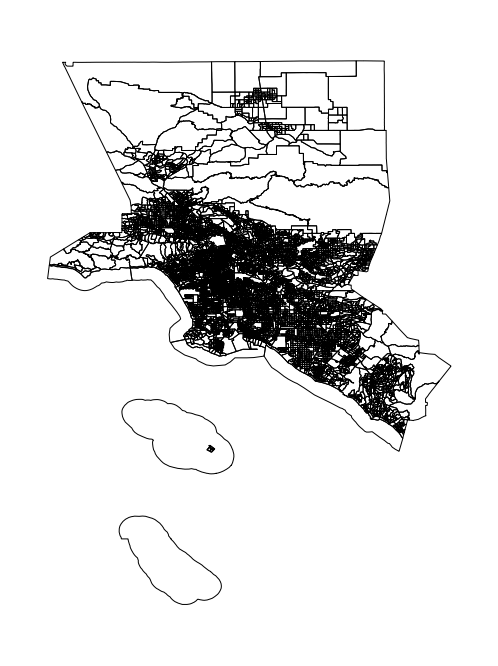

In [ ]:
geoplot.polyplot(gdf, figsize=(12, 12))


In [ ]:
gdf[gdf['pop_total'].astype(int)==0]

,cbg,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,pop_total,amount_land,amount_water,latitude,longitude,person_per_sq_meter,person_per_sq_meter_sqrt,geometry
358,060374303012,06,037,430301,2,CA,Los Angeles County,H1,0,14364441,53210,34.1868779,-117.9825368,0.0,0.0,"MULTIPOLYGON (((-118.02143 34.18372, -118.0213..."
465,060374002074,06,037,400207,4,CA,Los Angeles County,H1,0,1495716,1796,34.1558823,-117.758533,0.0,0.0,"MULTIPOLYGON (((-117.76779 34.15626, -117.7677..."
576,060375041021,06,037,504102,1,CA,Los Angeles County,H1,0,6362887,96818,33.8977271,-118.0397946,0.0,0.0,"MULTIPOLYGON (((-118.06397 33.89568, -118.0639..."
1278,060375734021,06,037,573402,1,CA,Los Angeles County,H1,0,1218445,0,33.8077849,-118.1681342,0.0,0.0,"MULTIPOLYGON (((-118.17630 33.80438, -118.1762..."
1420,060379800131,06,037,980013,1,CA,Los Angeles County,H1,0,5308530,0,33.9164971,-118.3871451,0.0,0.0,"MULTIPOLYGON (((-118.39627 33.92804, -118.3962..."
1821,060379800281,06,037,980028,1,CA,Los Angeles County,H1,0,17299747,2367417,33.9421429,-118.4173296,0.0,0.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1925,060590219241,06,059,021924,1,CA,Orange County,H1,0,73489550,2088029,33.811026,-117.6969462,0.0,0.0,"MULTIPOLYGON (((-117.74917 33.78205, -117.7486..."
2543,060374300033,06,037,430003,3,CA,Los Angeles County,H1,0,7723255,0,34.1819977,-117.9396868,0.0,0.0,"MULTIPOLYGON (((-117.95999 34.19416, -117.9595..."
2857,060379800011,06,037,980001,1,CA,Los Angeles County,H1,0,2315128,0,34.1997152,-118.3575367,0.0,0.0,"MULTIPOLYGON (((-118.37031 34.20120, -118.3658..."
2858,060379800021,06,037,980002,1,CA,Los Angeles County,H1,0,6773682,208608,33.8104081,-118.2386708,0.0,0.0,"MULTIPOLYGON (((-118.25753 33.80197, -118.2571..."


In [ ]:
# Remove blocks with zero population
gdf = gdf[gdf['pop_total'].astype(int)!=0]
gdf

,cbg,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,pop_total,amount_land,amount_water,latitude,longitude,person_per_sq_meter,person_per_sq_meter_sqrt,geometry
0,060373104003,06,037,310400,3,CA,Los Angeles County,H1,1286,764102,0,34.2035192,-118.3401897,0.001683,0.041025,"MULTIPOLYGON (((-118.35037 34.20667, -118.3499..."
1,060590865023,06,059,086502,3,CA,Orange County,H1,2545,290933,0,33.8454718,-117.9094315,0.008748,0.093529,"MULTIPOLYGON (((-117.91372 33.84724, -117.9135..."
2,060376510024,06,037,651002,4,CA,Los Angeles County,H1,1285,246669,0,33.8083636,-118.3239442,0.005209,0.072176,"MULTIPOLYGON (((-118.32800 33.80984, -118.3277..."
3,060376511011,06,037,651101,1,CA,Los Angeles County,H1,2708,871365,0,33.8183814,-118.3326885,0.003108,0.055747,"MULTIPOLYGON (((-118.34007 33.82307, -118.3400..."
4,060590994023,06,059,099402,3,CA,Orange County,H1,672,1299934,0,33.7082565,-118.0021699,0.000517,0.022737,"MULTIPOLYGON (((-118.00659 33.71548, -118.0052..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,060376033021,06,037,603302,1,CA,Los Angeles County,H1,1098,187317,0,33.8783144,-118.3022616,0.005862,0.076562,"MULTIPOLYGON (((-118.30479 33.88014, -118.3043..."
8244,060376033022,06,037,603302,2,CA,Los Angeles County,H1,2053,546315,0,33.875751,-118.3049125,0.003758,0.061302,"MULTIPOLYGON (((-118.30914 33.88013, -118.3086..."
8245,060376033023,06,037,603302,3,CA,Los Angeles County,H1,955,390896,10554,33.8778485,-118.3111783,0.002443,0.049428,"MULTIPOLYGON (((-118.31349 33.88049, -118.3134..."
8246,060376034001,06,037,603400,1,CA,Los Angeles County,H1,1785,282589,0,33.8978438,-118.3113014,0.006317,0.079477,"MULTIPOLYGON (((-118.31348 33.89941, -118.3134..."


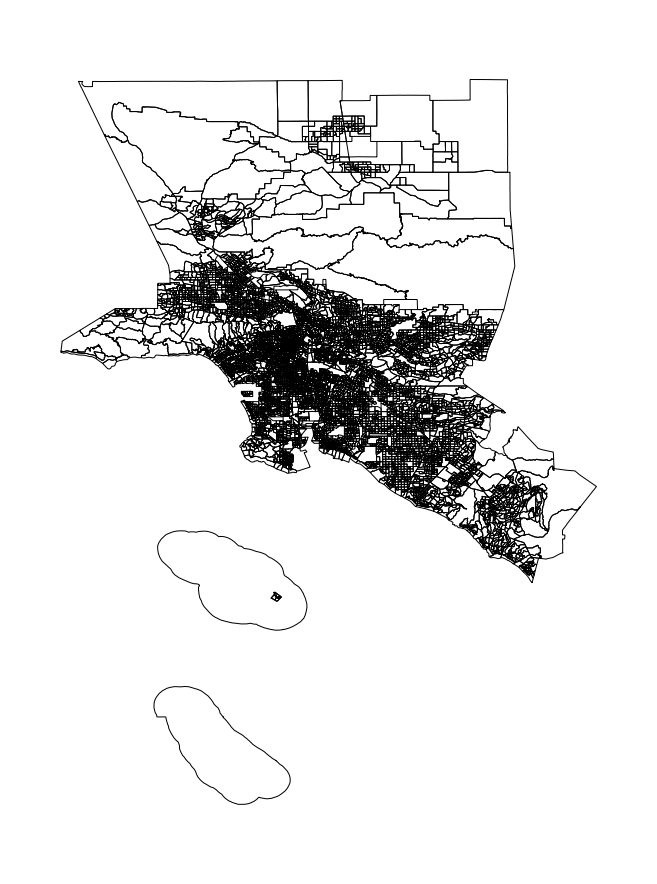

In [ ]:
geoplot.polyplot(gdf, figsize=(16,16))

In [ ]:
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month,percentage_completely_home_deviation
2426095,2020-01-01 00:00:00+00:00,060374034022,180,72,7,4,40.000000,3.888889,2.222222,0.476644,-0.712484,-0.715133,1,9.854508
2428827,2020-01-01 00:00:00+00:00,060375705014,62,30,5,1,48.387097,8.064516,1.612903,1.149898,0.091558,-0.874239,1,18.241605
2428828,2020-01-01 00:00:00+00:00,060375727004,64,30,4,3,46.875000,6.250000,4.687500,1.028518,-0.257838,-0.071400,1,16.729508
2428829,2020-01-01 00:00:00+00:00,060379005011,71,37,1,1,52.112676,1.408451,1.408451,1.448960,-1.190108,-0.927625,1,21.967184
2428830,2020-01-01 00:00:00+00:00,060590320154,106,28,5,1,26.415094,4.716981,0.943396,-0.613851,-0.553030,-1.049060,1,-3.730398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908426,2020-12-31 00:00:00+00:00,060375550013,49,16,3,4,32.653061,6.122449,8.163265,-0.113114,-0.282399,0.836191,12,2.507569
2908427,2020-12-31 00:00:00+00:00,060590423361,146,53,9,1,36.301370,6.164384,0.684932,0.179746,-0.274324,-1.116551,12,6.155878
2908428,2020-12-31 00:00:00+00:00,060372920002,53,18,4,4,33.962264,7.547170,7.547170,-0.008021,-0.008060,0.675316,12,3.816772
2908334,2020-12-31 00:00:00+00:00,060371232032,25,10,1,1,40.000000,4.000000,4.000000,0.476644,-0.691089,-0.250920,12,9.854508


In [ ]:
rolling_mobility = devices_mobility.rolling(10).mean()[9:]
rolling_mobility

,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month,percentage_completely_home_deviation
2428835,6.046137e+10,127.5,38.1,6.4,2.6,35.038713,5.690721,2.989931,0.078389,-0.365531,-0.514669,1.0,4.893221
2428836,6.048305e+10,137.3,40.1,6.8,3.0,34.348066,5.697515,3.055478,0.022949,-0.364222,-0.497554,1.0,4.202574
2428837,6.048305e+10,135.2,38.9,6.7,3.2,33.899600,5.866674,3.625895,-0.013051,-0.331650,-0.348606,1.0,3.754108
2428838,6.048305e+10,136.5,37.5,6.5,3.0,31.290022,5.501414,3.287015,-0.222528,-0.401983,-0.437095,1.0,1.144530
2428839,6.048285e+10,141.6,37.2,6.5,3.0,28.865640,5.442536,3.228138,-0.417140,-0.413320,-0.452469,1.0,-1.279852
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908426,6.039587e+10,63.4,22.6,3.3,2.0,35.021684,5.899285,4.078413,0.077022,-0.325370,-0.230445,12.0,4.876192
2908427,6.041701e+10,59.0,21.8,3.6,1.7,35.441294,6.199934,3.936380,0.110705,-0.267479,-0.267533,12.0,5.295802
2908428,6.039521e+10,55.5,20.5,3.7,1.8,35.314794,6.613742,4.350188,0.100550,-0.187797,-0.159479,12.0,5.169302
2908334,6.039521e+10,55.7,21.0,3.7,1.8,37.140880,6.578959,4.315405,0.247135,-0.194495,-0.168562,12.0,6.995389


In [ ]:
rolling_mobility['percentage_completely_home_deviation'] = rolling_mobility['percentage_completely_home'] - stat_2019.loc['mean','percentage_completely_home']
rolling_mobility

,cbg,total,completely_home,part_time_work,full_time_work,percentage_completely_home,percentage_part_time_work,percentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month,percentage_completely_home_deviation
2428835,6.046137e+10,127.5,38.1,6.4,2.6,35.038713,5.690721,2.989931,0.078389,-0.365531,-0.514669,1.0,4.893221
2428836,6.048305e+10,137.3,40.1,6.8,3.0,34.348066,5.697515,3.055478,0.022949,-0.364222,-0.497554,1.0,4.202574
2428837,6.048305e+10,135.2,38.9,6.7,3.2,33.899600,5.866674,3.625895,-0.013051,-0.331650,-0.348606,1.0,3.754108
2428838,6.048305e+10,136.5,37.5,6.5,3.0,31.290022,5.501414,3.287015,-0.222528,-0.401983,-0.437095,1.0,1.144530
2428839,6.048285e+10,141.6,37.2,6.5,3.0,28.865640,5.442536,3.228138,-0.417140,-0.413320,-0.452469,1.0,-1.279852
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908426,6.039587e+10,63.4,22.6,3.3,2.0,35.021684,5.899285,4.078413,0.077022,-0.325370,-0.230445,12.0,4.876192
2908427,6.041701e+10,59.0,21.8,3.6,1.7,35.441294,6.199934,3.936380,0.110705,-0.267479,-0.267533,12.0,5.295802
2908428,6.039521e+10,55.5,20.5,3.7,1.8,35.314794,6.613742,4.350188,0.100550,-0.187797,-0.159479,12.0,5.169302
2908334,6.039521e+10,55.7,21.0,3.7,1.8,37.140880,6.578959,4.315405,0.247135,-0.194495,-0.168562,12.0,6.995389


In [ ]:
count = 0
path = Path('drive/MyDrive/big-data-project/media/animate/athome/{}-time'.format(city_directory))
path.mkdir(parents=True, exist_ok=True)

In [ ]:
str(days[0]).split(' ')[0]

'2020-01-01'

In [ ]:

import matplotlib.pyplot as plt

# Turn interactive plotting off
plt.ioff()

import mapclassify
# For Each day select data, 
for day in tqdm(days):
  # setup new arrays to use
  # print(day)

  row = devices_mobility[devices_mobility['date']==day]
  merged_gdf = gdf.merge(row, how='inner', left_on='cbg', right_on='cbg')

  scheme = mapclassify.Quantiles(devices_mobility['percentage_completely_home_deviation'], k=10)

  fig, ax = plt.subplots(1, 1, figsize=(20,20))

  geoplot.choropleth(merged_gdf, hue=merged_gdf['percentage_completely_home_deviation'], 
                     edgecolor='white', linewidth=0.5,
                     scheme=scheme,
                     ax=ax, 
                     cmap='RdBu',
                     legend=True)
  
  fig.savefig(path/(str(day).split(' ')[0]+'.png'))
  plt.close(fig)



# Loop insert zeros for all empty rows
# merge all cbg with map, 
# create map visualization, 
# save image with frame number